In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [2]:
sns.set(style='white', context='notebook', palette='deep')

In [3]:
train = pd.read_csv("/Users/ijiseon/Desktop/ESAA-OB/titanic/train.csv")

In [4]:
test = pd.read_csv("/Users/ijiseon/Desktop/ESAA-OB/titanic/test.csv")

> ## Check data

In [5]:
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3-Q1
        
        outlier_step = 1.5*IQR
        
        #Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col]<Q1-outlier_step)|(df[col]>Q3+outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)
        

    return multiple_outliers 
    

In [6]:
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

In [7]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [8]:
train = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)

In [9]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [10]:
dataset = dataset.fillna(np.nan)

In [11]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [12]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


> ## Feature analysis

### Numerical values

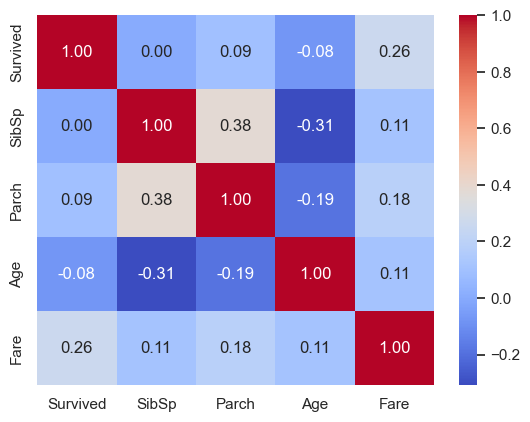

In [16]:
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True, fmt=".2f",cmap="coolwarm")

+ sns.factorplot: seaborn의 factorplot 함수는 범주형 변수와 수치형 변수 간의 관계를 시각화하는 데 사용됩니다. 이 함수는 주어진 데이터를 요인(factor)별로 분리하고 각 요인에 대한 그래프를 그립니다.

#### SibSp

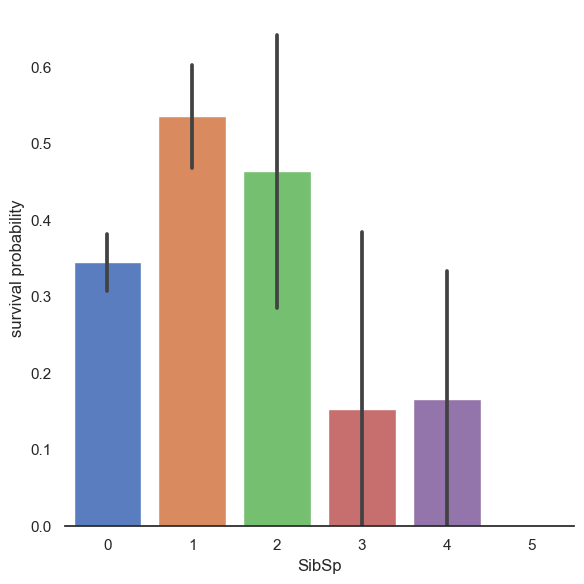

In [17]:
g = sns.catplot(x="SibSp", y="Survived", data=train, kind="bar",height=6, palette="muted")

g.despine(left=True)

g = g.set_ylabels("survival probability")

#### Parch

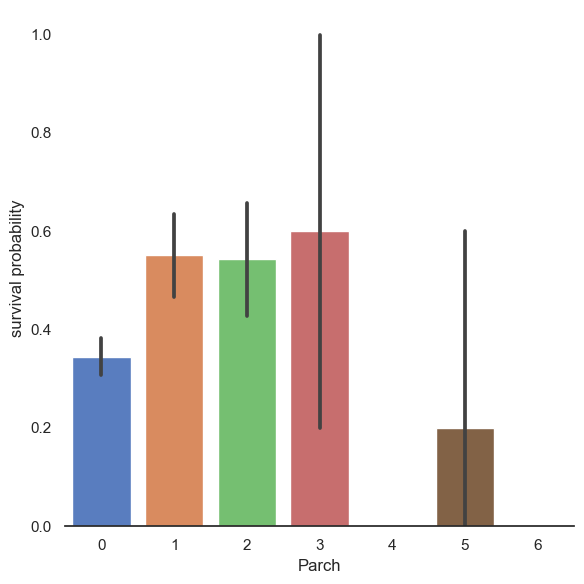

In [18]:
g = sns.catplot(x="Parch", y="Survived", data=train, kind="bar",height=6, palette="muted")

g.despine(left=True)

g = g.set_ylabels("survival probability")

#### Age 

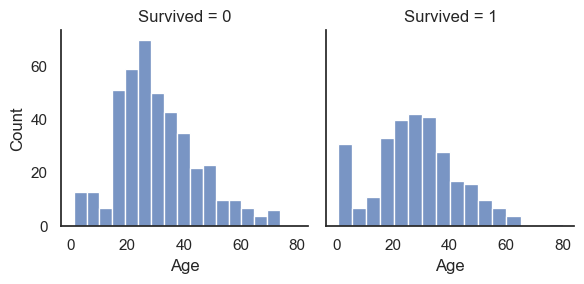

In [19]:
g = sns.FacetGrid(train, col="Survived")
g = g.map(sns.histplot,"Age")

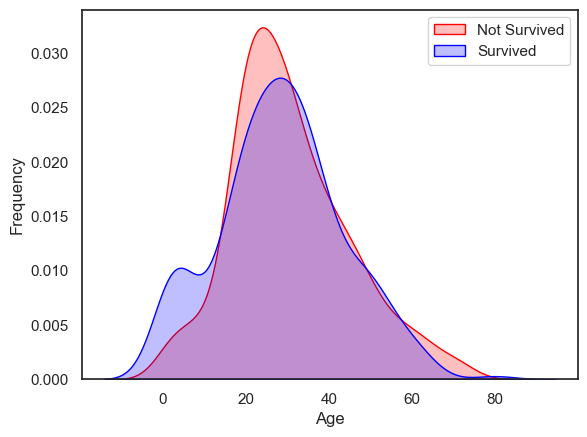

In [20]:
g = sns.kdeplot(train["Age"][(train["Survived"]==0)&(train["Age"].notnull())],color="Red",shade=True)

g = sns.kdeplot(train["Age"][(train["Survived"]==1)&(train["Age"].notnull())],color="Blue",shade=True)

g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

#### Fare

In [21]:
dataset["Fare"].isnull().sum()

1

In [22]:
dataset["Fare"]=dataset["Fare"].fillna(dataset["Fare"].median())

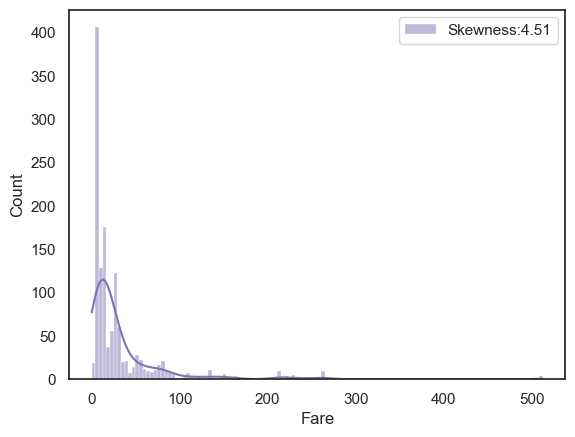

In [23]:
g = sns.histplot(dataset["Fare"], color="m", kde=True ,label="Skewness:%.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

In [24]:
dataset["Fare"] = dataset["Fare"].map(lambda i : np.log(i) if i>0 else 0)

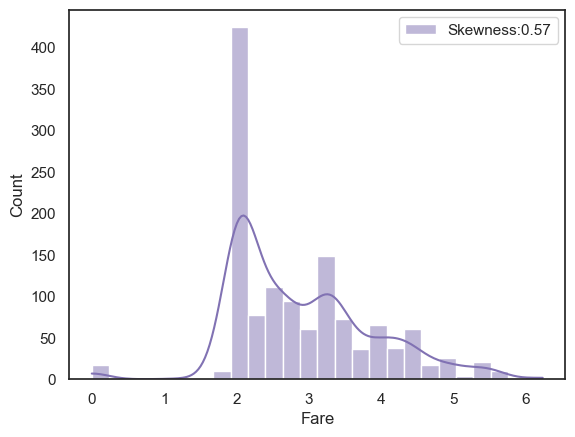

In [25]:
g = sns.histplot(dataset["Fare"], color="m", kde=True ,label="Skewness:%.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

### Categorical values

#### Sex

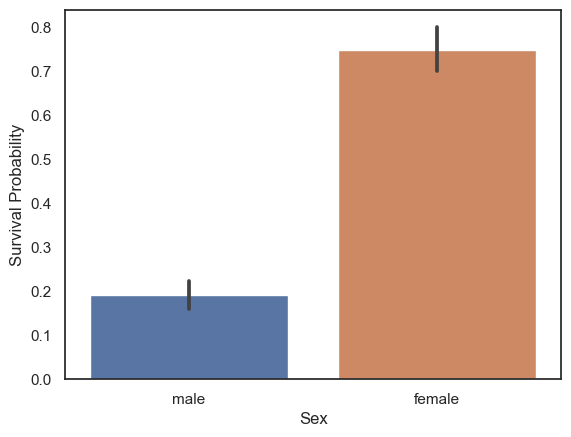

In [26]:
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")

In [27]:
train[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.747573
male,0.190559


#### Pclass

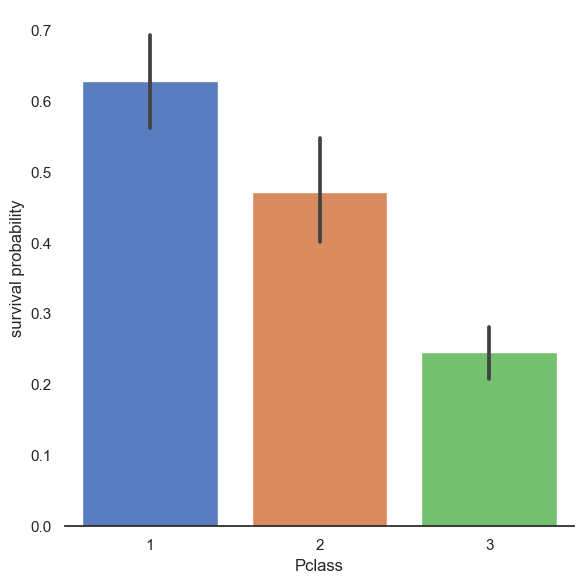

In [28]:
g = sns.catplot(x="Pclass", y="Survived", data=train, kind="bar", height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

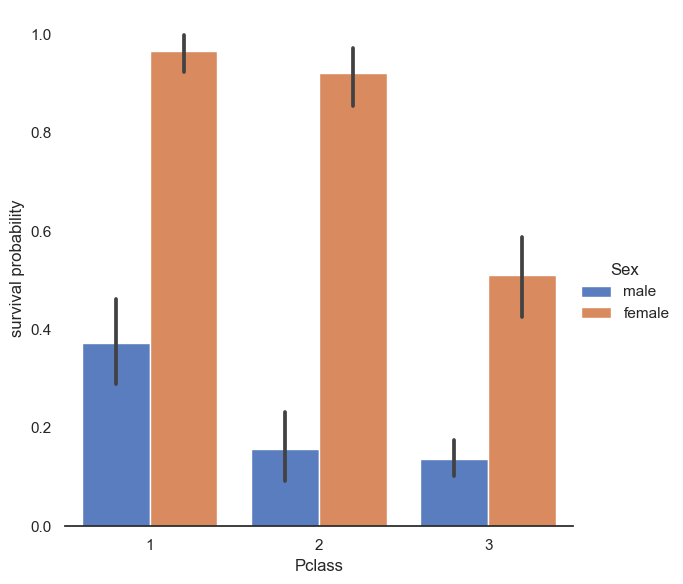

In [29]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train, kind="bar", height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#### Embarked

In [30]:
dataset["Embarked"].isnull().sum()

2

In [31]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")

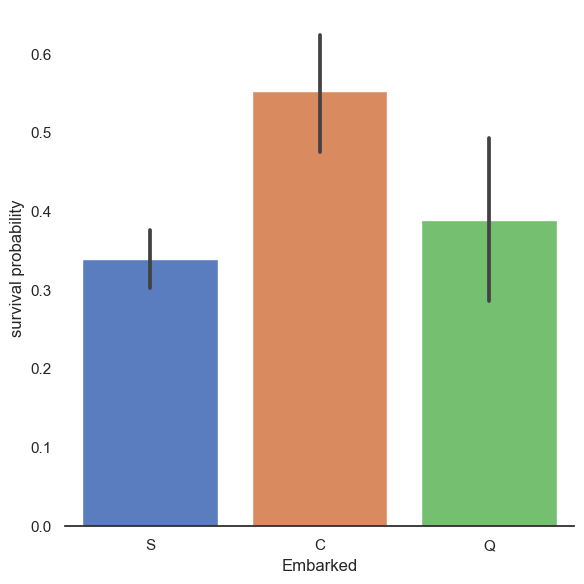

In [32]:
g = sns.catplot(x="Embarked", y="Survived",  data=train, height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

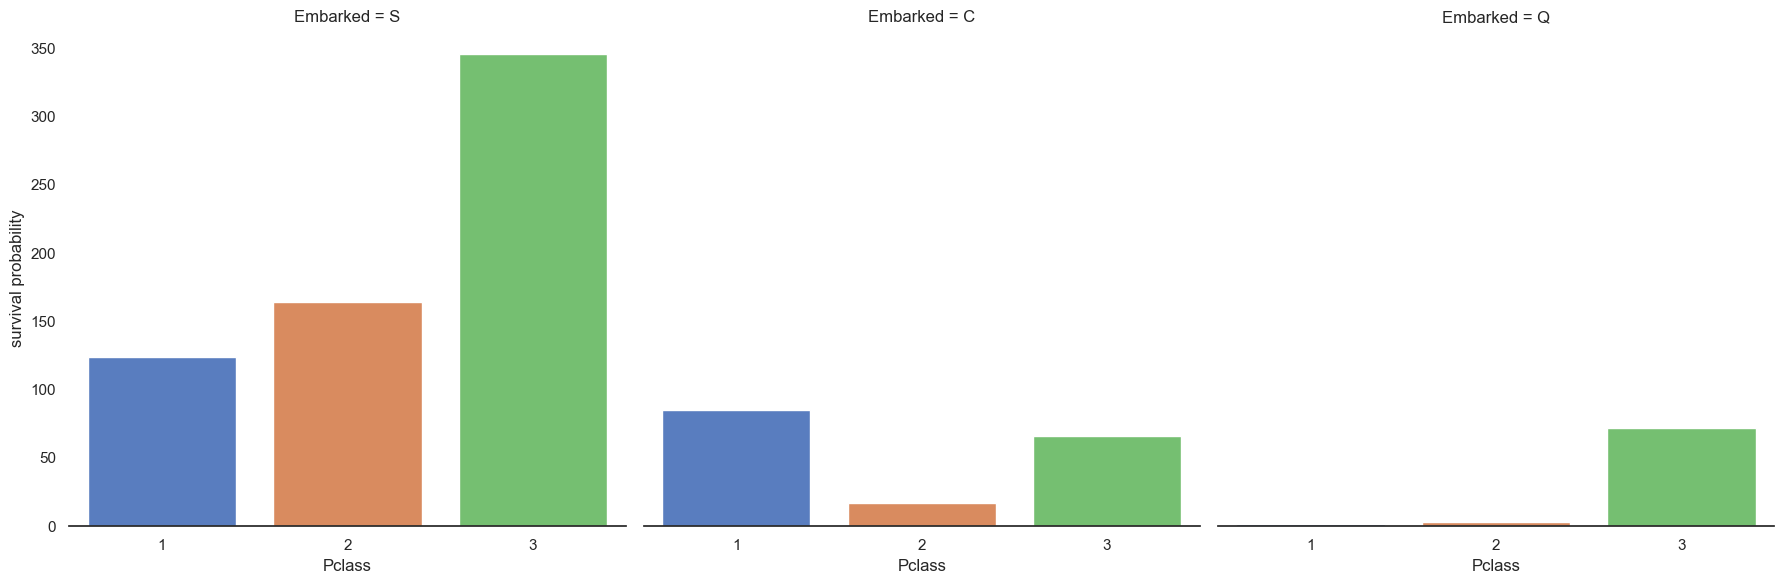

In [33]:
g = sns.catplot(x="Pclass", col="Embarked",  data=train, height=6, kind="count", palette="muted")

g.despine(left=True)
g = g.set_ylabels("survival probability")

> ## Filling missing Values

#### Age

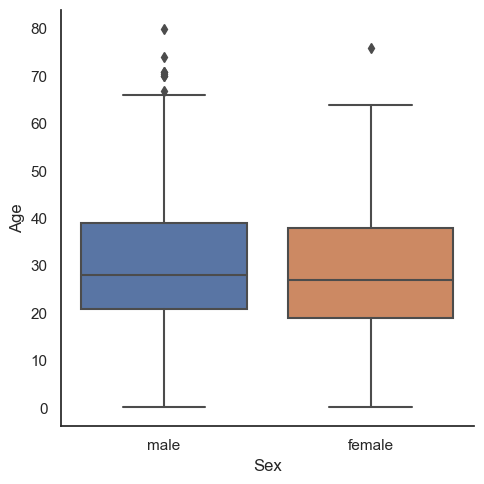

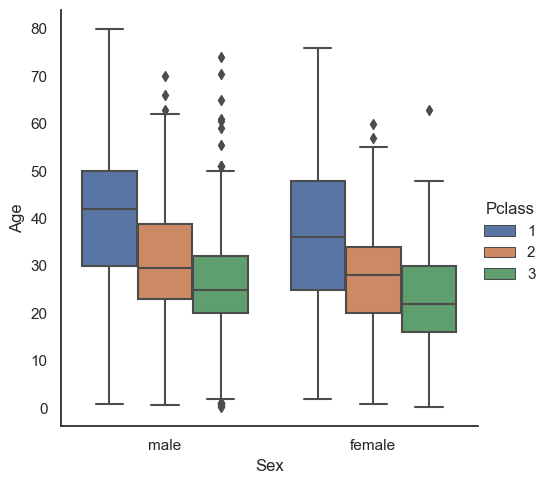

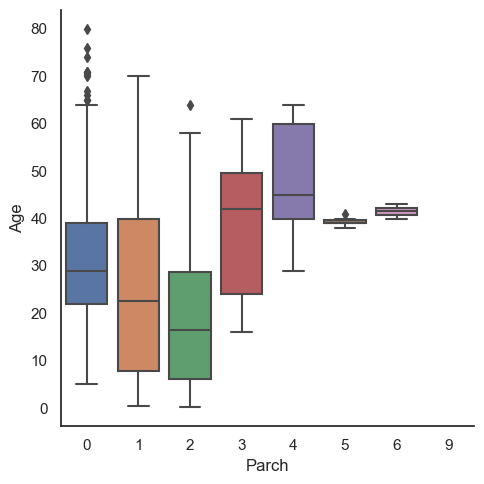

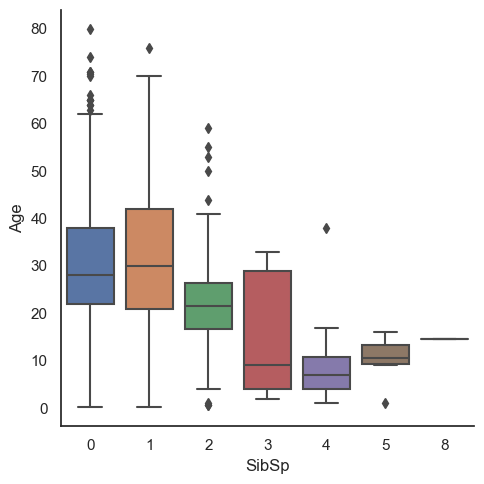

In [34]:
g = sns.catplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.catplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.catplot(y="Age",x="SibSp", data=dataset,kind="box")

- Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age.

- However, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.

- Moreover, the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is.

In [35]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

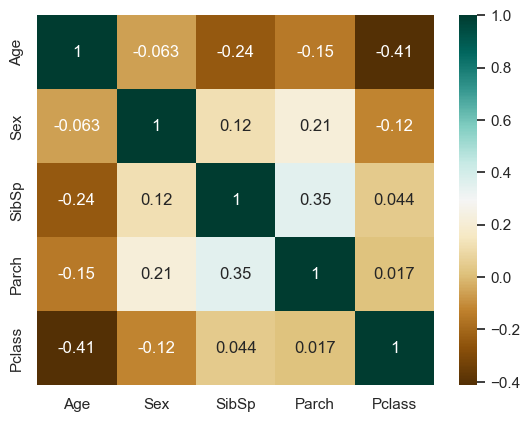

In [36]:
g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

- The correlation map confirms the factorplots observations except for Parch. Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp.

- In the plot of Age in function of Parch, Age is growing with the number of parents / children. But the general correlation is negative.

- So, i decided to use SibSP, Parch and Pclass in order to impute the missing ages.

- The strategy is to fill Age with the median age of similar rows according to Pclass, Parch and SibSp.

In [37]:
## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows

index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age:
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][
        ((dataset["SibSp"]==dataset.iloc[i]["SibSp"])
         &(dataset["Parch"]==dataset.iloc[i]["Parch"])
         &(dataset["Pclass"]==dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        dataset["Age"].iloc[i]= age_pred
    else:
        dataset["Age"].iloc[i]=age_med

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_7971/4196142749.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age"].iloc[i]= age_pred
/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_7971/4196142749.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age"].iloc[i]=age_med


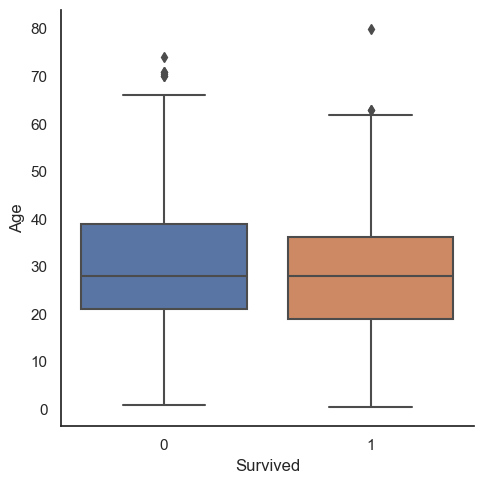

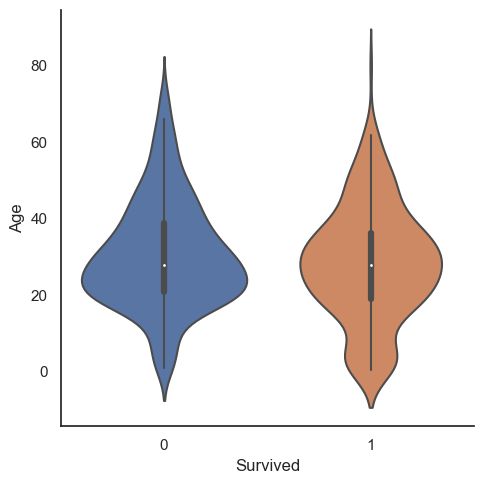

In [38]:
g = sns.catplot(x="Survived", y = "Age",data = train, kind="box")
g = sns.catplot(x="Survived", y = "Age",data = train, kind="violin")

> ## Feature engineering

In [39]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [40]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

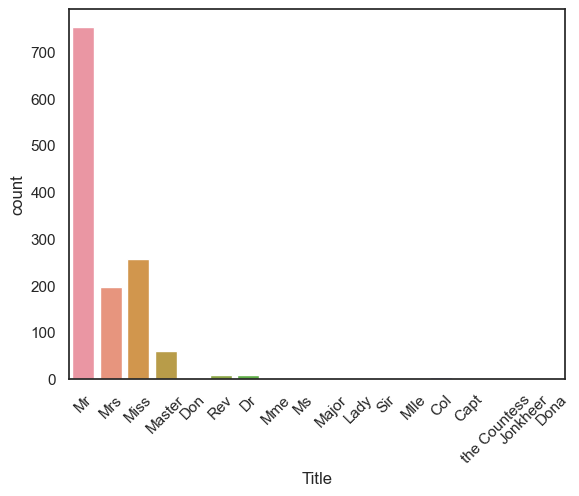

In [41]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [42]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

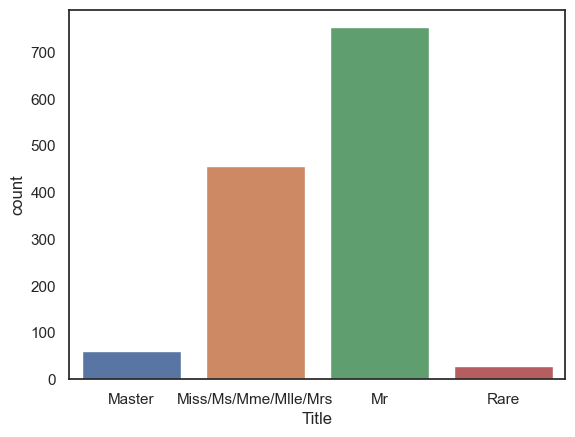

In [43]:
g = sns.countplot(data=dataset, x="Title")
g.set_xticklabels(["Master", "Miss/Ms/Mme/Mlle/Mrs", "Mr", "Rare"])
plt.show()

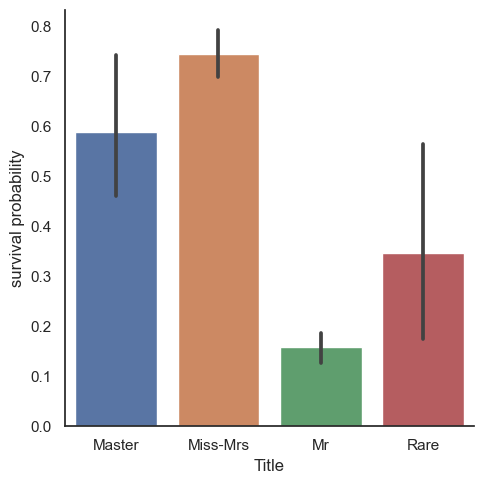

In [44]:
g = sns.catplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [45]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

* Family size

We can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So, i choosed to create a "Fize" (family size) feature which is the sum of SibSp , Parch and 1 (including the passenger).

In [46]:
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

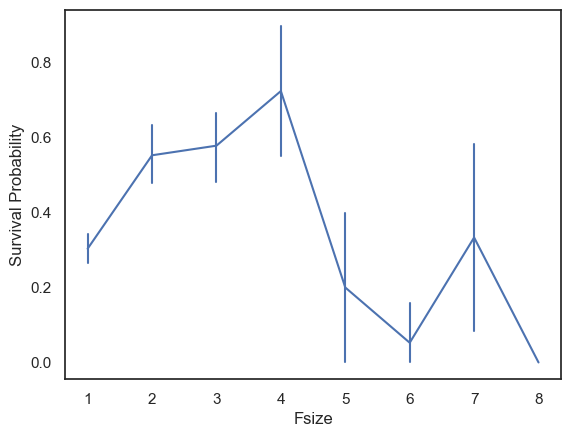

In [47]:
g = sns.lineplot(x="Fsize",y="Survived",data = dataset, err_style='bars')
g = g.set_ylabel("Survival Probability")

In [48]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

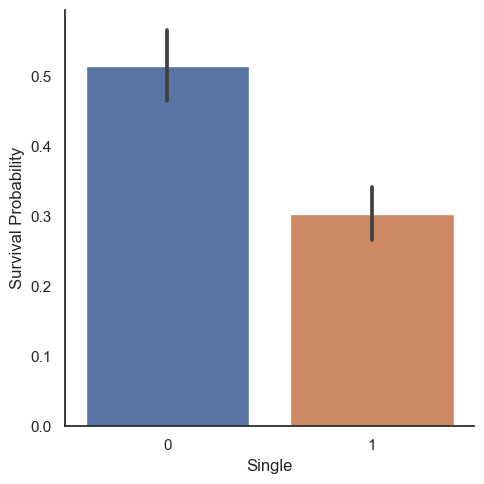

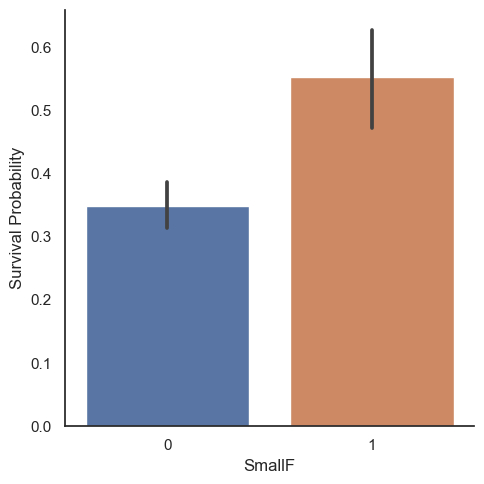

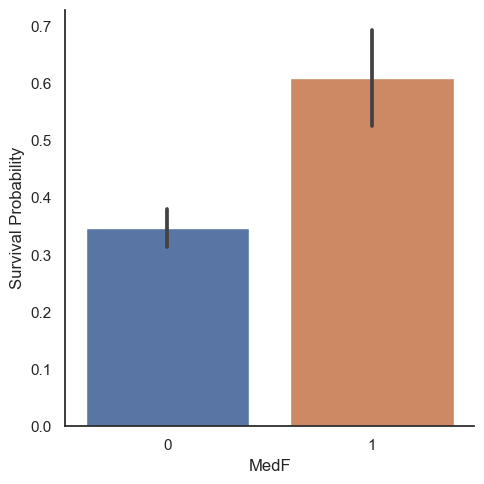

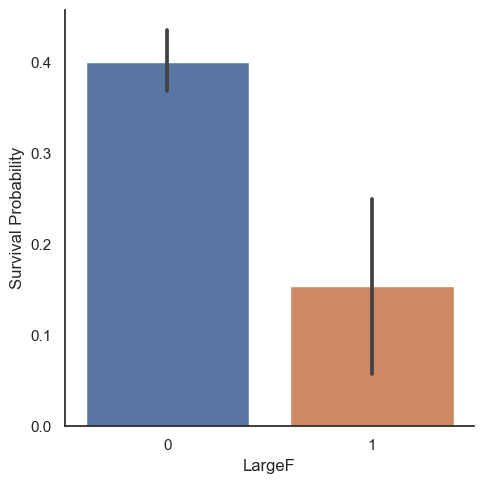

In [49]:
g = sns.catplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [50]:
# convert to indicator values Title and Embarked 
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [51]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,0,0,1,0,0,0,1


#### Cabin

In [52]:
dataset["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [53]:
dataset["Cabin"].describe()

count     292
unique    186
top        G6
freq        5
Name: Cabin, dtype: object

In [54]:
dataset["Cabin"].isnull().sum()

1007

In [55]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [56]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else "X" for i in dataset["Cabin"]])


이 코드는 "Cabin" 열의 각 값을 처리하여 데이터셋의 "Cabin" 열을 업데이트하는 것입니다.

여기서 사용된 코드는 리스트 컴프리헨션(List Comprehension)입니다. 코드를 해석해보면:

- for i in dataset["Cabin"]: "Cabin" 열의 각 값에 대해 반복합니다.

- if not pd.isnull(i): 만약 현재 값 i가 NaN이 아니라면,

- [i[0]]: 해당 값의 첫 번째 문자를 가진 리스트를 생성합니다. 예를 들어, 만약 i가 "C85"라면, 이 코드는 리스트 ["C"]를 생성합니다.

- else "X": 그렇지 않으면(즉, 값이 NaN이라면), "X"를 반환합니다.

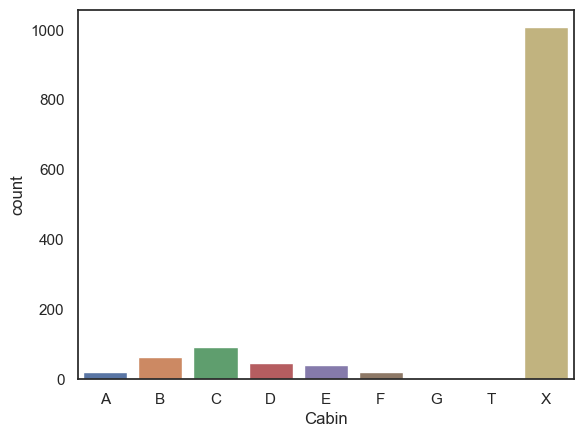

In [57]:
dataset["Cabin"] = dataset["Cabin"].astype(str)
g = sns.countplot(data=dataset, x="Cabin", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'])

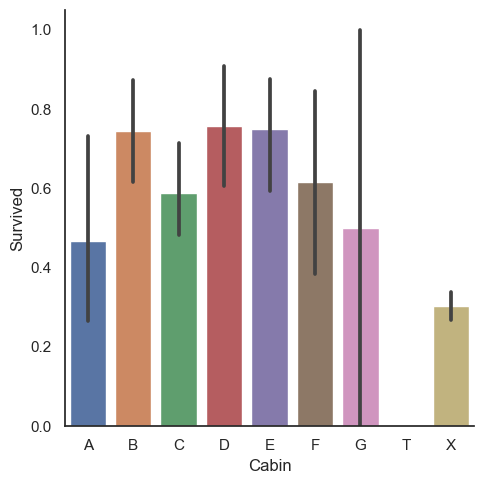

In [58]:
g = sns.catplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])

In [59]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

#### Ticket

In [60]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [63]:
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) 
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [64]:
dataset = pd.get_dummies(dataset, columns=["Ticket"], prefix="T")

In [62]:
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [61]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [65]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,MedF,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,0.0,0,22.0,1,0,1.981001,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,4.266662,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,26.0,0,0,2.070022,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,1,35.0,1,0,3.972177,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0,35.0,0,0,2.085672,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


>  # Modeling

In [66]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_7971/2077787899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=["Survived"],axis = 1,inplace=True)


In [67]:
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

/var/folders/f4/skyf3wfx5570p30yjkrfkxd00000gn/T/ipykernel_7971/335406205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Survived"] = train["Survived"].astype(int)



- SVC

- Decision Tree

- AdaBoost

- Random Forest

- Extra Trees

- Gradient Boosting

- Multiple layer perceprton (neural network)

- KNN

- Logistic regression

- Linear Discriminant Analysis



In [68]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [69]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [70]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=Y_train,
                                     scoring="accuracy", cv=kfold, n_jobs=4))

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ijiseon/o

In [71]:
cv_results

[array([0.69662921, 0.70454545, 0.68181818, 0.80681818, 0.68181818,
        0.73863636, 0.71590909, 0.72727273, 0.79545455, 0.72727273]),
 array([0.70786517, 0.82954545, 0.73863636, 0.80681818, 0.82954545,
        0.82954545, 0.79545455, 0.77272727, 0.84090909, 0.84090909]),
 array([0.71910112, 0.73863636, 0.75      , 0.81818182, 0.78409091,
        0.84090909, 0.81818182, 0.76136364, 0.84090909, 0.82954545]),
 array([0.7752809 , 0.82954545, 0.71590909, 0.81818182, 0.82954545,
        0.85227273, 0.82954545, 0.72727273, 0.82954545, 0.86363636]),
 array([0.75280899, 0.79545455, 0.73863636, 0.82954545, 0.80681818,
        0.85227273, 0.85227273, 0.70454545, 0.81818182, 0.85227273]),
 array([0.84269663, 0.79545455, 0.75      , 0.875     , 0.875     ,
        0.81818182, 0.86363636, 0.77272727, 0.86363636, 0.84090909]),
 array([0.80898876, 0.81818182, 0.78409091, 0.875     , 0.81818182,
        0.77272727, 0.84090909, 0.79545455, 0.85227273, 0.84090909]),
 array([0.7752809 , 0.77272727, 0.

In [72]:
cv_means = []
cv_std =[]

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [73]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

<ErrorbarContainer object of 3 artists>

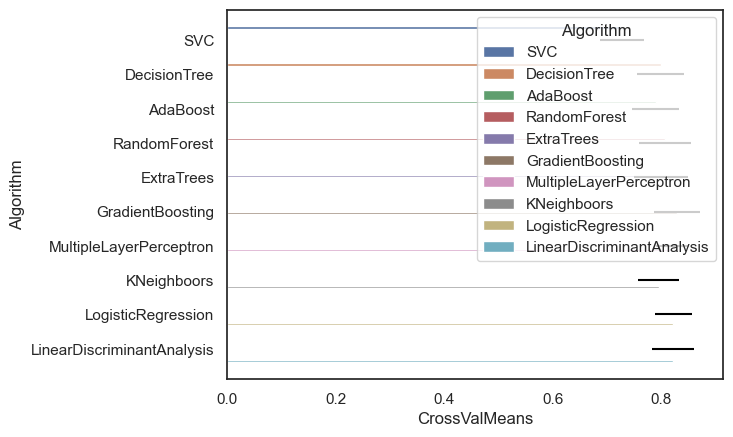

In [74]:
g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, hue="Algorithm", orient="h")
g.errorbar(x=cv_res['CrossValMeans'], y=cv_res['Algorithm'], xerr=cv_std, fmt='none', c='black')


/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


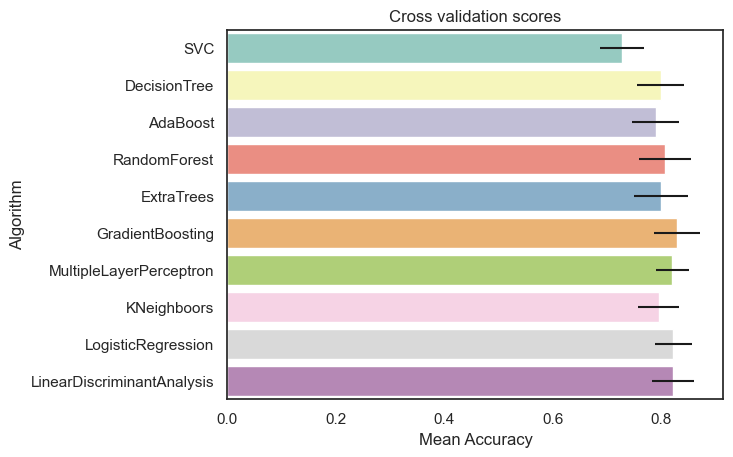

In [79]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

> ### Hyperparameter tunning for best models

In [81]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Users/ijiseon/opt/anacon

In [82]:
gsadaDTC.best_score_

0.8275536261491319

In [83]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.833158835546476

In [84]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8308988764044944

In [89]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss': ['exponential', 'log_loss'],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


0.8320224719101124

In [90]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8331332992849847

In [91]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


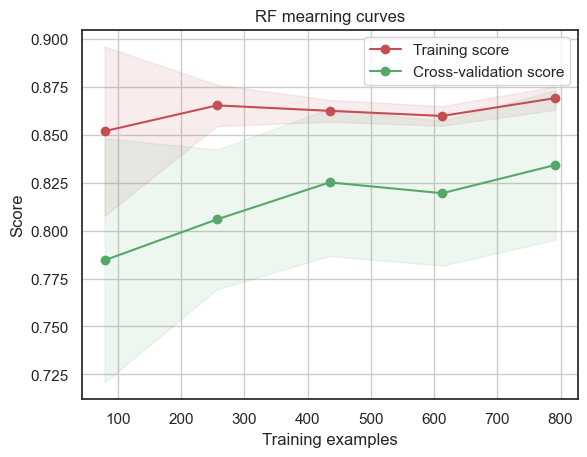

In [92]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)

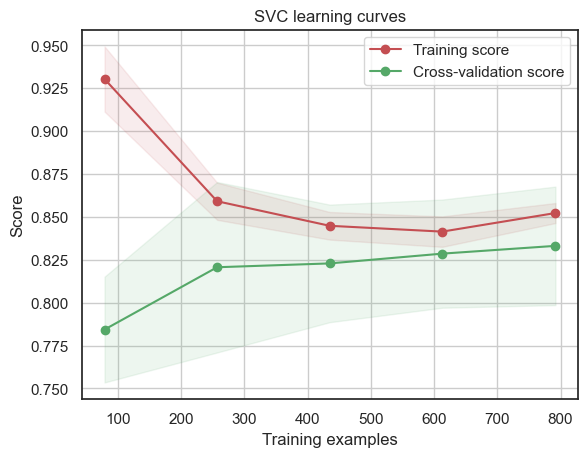

In [93]:
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)

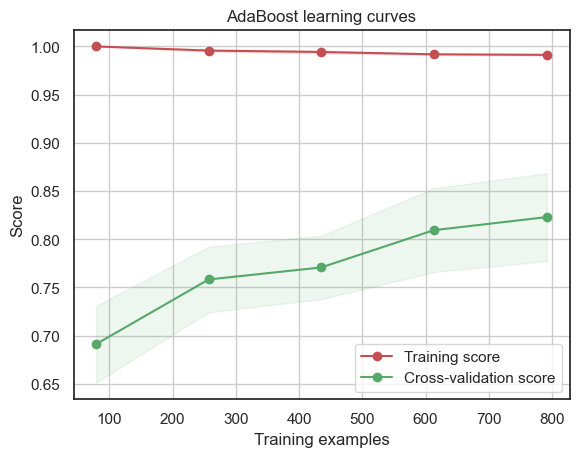

In [94]:
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)

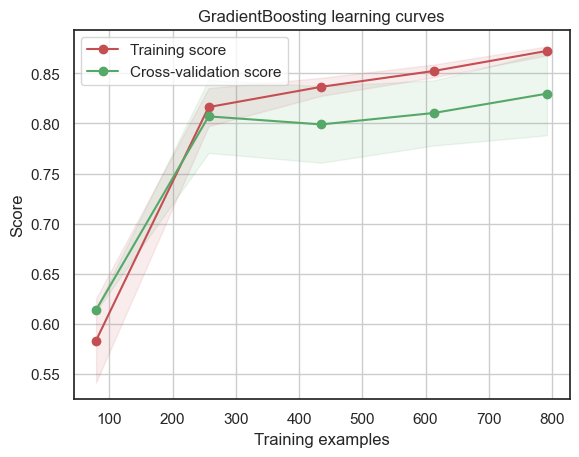

In [95]:
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

- GradientBoosting and Adaboost classifiers tend to overfit the training set. According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.

- SVC and ExtraTrees classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.

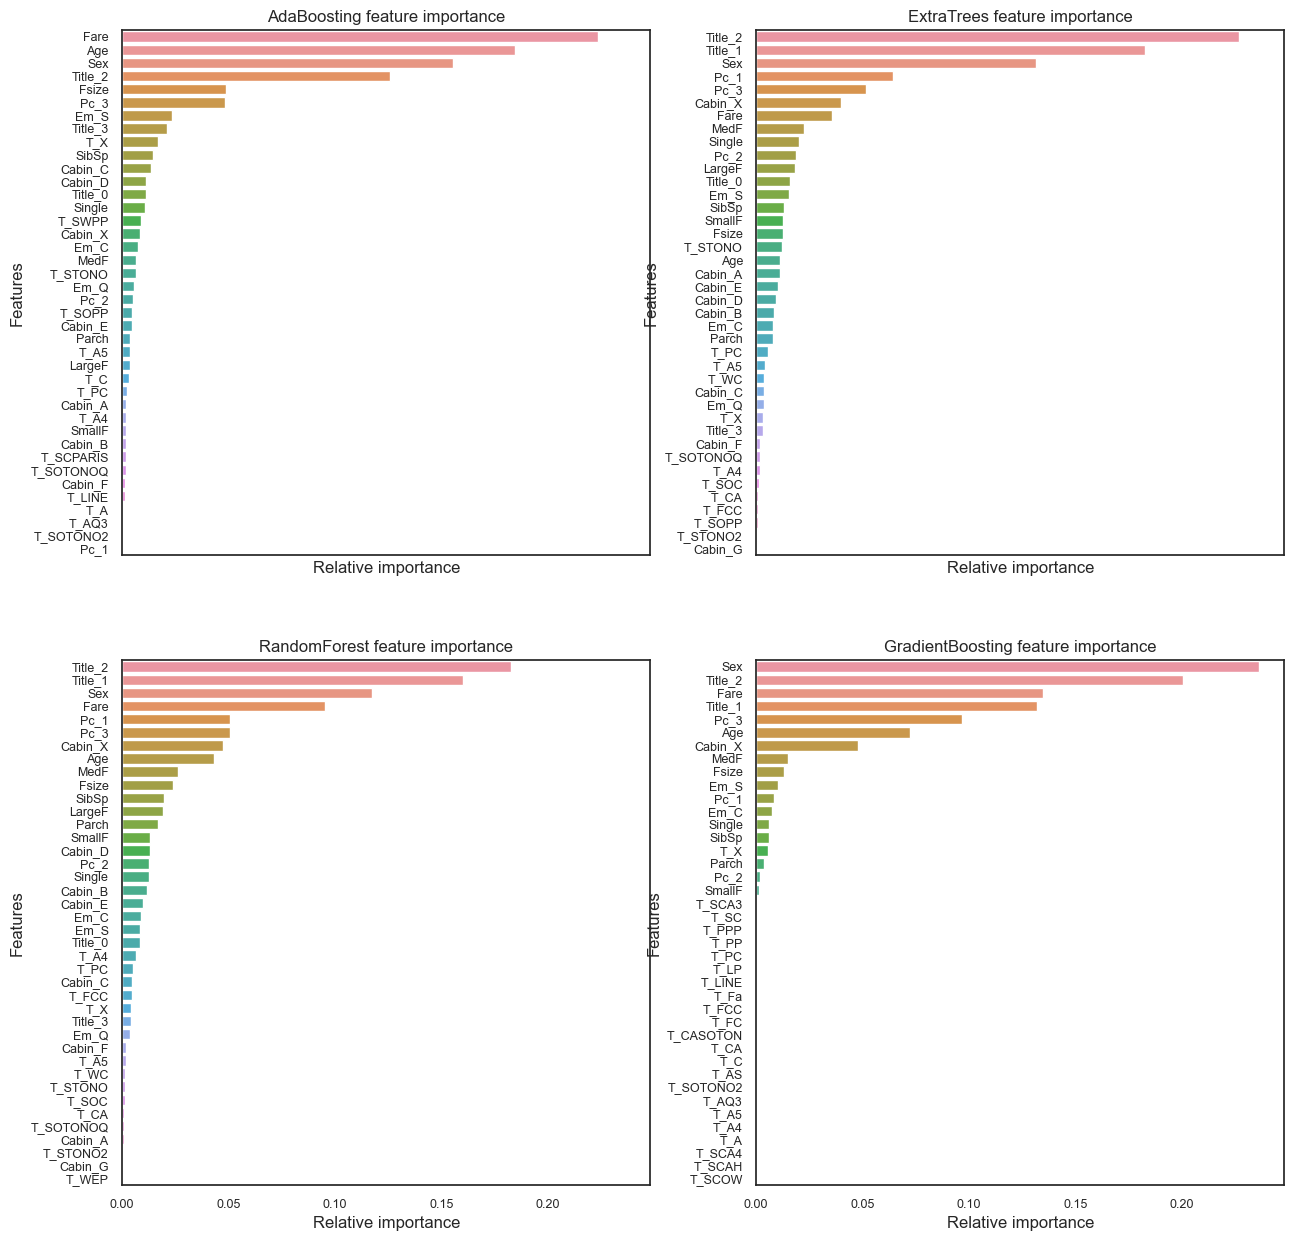

In [96]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

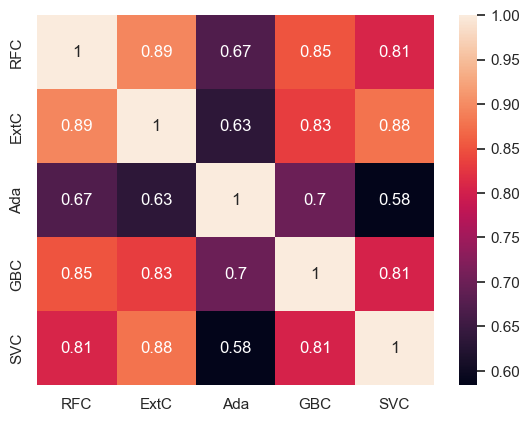

In [97]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [98]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [100]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

In [101]:
test_Survived

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64